In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('bikes.csv')
df.head(6)

,Bike Model,Mileage,Sell Price,Age
0,Royal Enfield Classic 350,15000,2500,2
1,Royal Enfield Classic 350,30000,2100,3
2,Royal Enfield Classic 350,5000,2800,1
3,Royal Enfield Classic 350,40000,1800,4
4,Royal Enfield Classic 350,25000,2300,3
5,KTM Duke 200,10000,2700,2


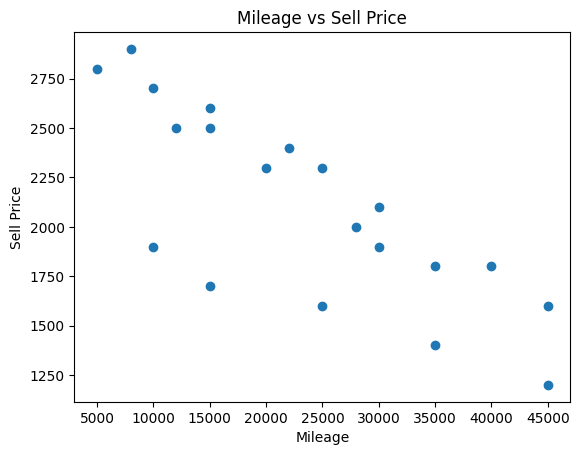

In [21]:
plt.scatter(df['Mileage'], df['Sell Price'])
plt.xlabel('Mileage')
plt.ylabel('Sell Price')
plt.title('Mileage vs Sell Price')
plt.show()

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')

In [13]:
df_transformed = ct.fit_transform(df)
df_transformed = pd.DataFrame(df_transformed, columns=['Royal Enfield Classic 350','KTM Duke 200','Yamaha R15','Bajaj Pulsar 150','Mileage','Sell' 'Price','Age'])
df_transformed.head(6)

,Royal Enfield Classic 350,KTM Duke 200,Yamaha R15,Bajaj Pulsar 150,Mileage,SellPrice,Age
0,0.0,0.0,1.0,0.0,15000.0,2500.0,2.0
1,0.0,0.0,1.0,0.0,30000.0,2100.0,3.0
2,0.0,0.0,1.0,0.0,5000.0,2800.0,1.0
3,0.0,0.0,1.0,0.0,40000.0,1800.0,4.0
4,0.0,0.0,1.0,0.0,25000.0,2300.0,3.0
5,0.0,1.0,0.0,0.0,10000.0,2700.0,2.0


In [15]:
final_df = df_transformed.drop(['KTM Duke 200','Yamaha R15'], axis=1)


In [16]:
final_df.head()

,Royal Enfield Classic 350,Bajaj Pulsar 150,Mileage,SellPrice,Age
0,0.0,0.0,15000.0,2500.0,2.0
1,0.0,0.0,30000.0,2100.0,3.0
2,0.0,0.0,5000.0,2800.0,1.0
3,0.0,0.0,40000.0,1800.0,4.0
4,0.0,0.0,25000.0,2300.0,3.0


In [23]:
from sklearn import linear_model
model = linear_model.LinearRegression()
X = final_df.drop('SellPrice', axis=1)
y = final_df['SellPrice']
model.fit(X,y)

LinearRegression()

In [24]:
model.score(X,y)

0.9688259140478098

In [27]:
model.predict([[1, 0, 50, 2]])  # Example prediction

C:\Users\dhruv\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2044.71077773])

In [28]:
model.predict([[0, 0, 150, 1]])

C:\Users\dhruv\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2835.30663781])